### Ejercicio 1



La ecuación que describe la formación de imágenes de una lente convergente está dada por:
$$\frac{n'}{s'} + \frac{n}{s} = \frac{n'}{f'}$$
donde $n$ y $s$ son respectivamente el índice de refracción y la distancia objeto a la izquierda de la lente, $n'$ y $s'$ el índice de refracción y la distancia imagen a la derecha de la lente y $f'$ la distancia focal imagen. [1] 

<p align="center">
  <img src="lens.png" alt="Trazado de rayos" width="700">
</p>

El cociente entre el tamaño de la imagen y el tamaño del objeto define el aumento $m$, el cual también se puede calcular como el cociente entre $s'$ y $s$.

Para el caso donde el objeto se encuentra muy lejano a la lente $s\rightarrow \infty$, resultando $s' = f'$. En el trazado de rayos, esto se representa haciendo que los rayos provenientes del objeto ingresen paralelos a la lente (ya que vienen del infinito), lo cual coincide con la representación de foco lejano en el sistema visual humano.

Para un celular ubicado a 30 cm de nuestros ojos la distancia objeto resulta $s=300~\mathrm{mm}$, el índice de refracción del aire (a la izquierda de la lente) es $n=1$ y el índice de refracción del humor vítreo (a la derecha) es $n'=1,336$. En condiciones de foco lejano, el cristalino se aplana aumentando la distancia focal imagen, la cual puede alcanzar como máximo un valor $f' = 17~\mathrm{mm}$. De la ecuación para lentes delgadas resulta $s' = 17,75~\mathrm{mm}$ (cercano a $f'$ dado que el celular está lejos de la lente).

Dada la densidad de 150000 conos por $\mathrm{mm}^2$ en el sensor, si el área total de este es de $S_s = 2,25~\mathrm{mm}^2$, el número total de conos en el sensor será de 337500, cada uno con una superficie $S_{cono} = 6,67 \times 10^{-6}~\mathrm{mm}^2$.

Teniendo en cuenta que el tamaño del menor punto visible sobre una pantalla de LCD a $30 \mathrm{cm}$ debe formar una imagen como mínimo de superficie $S_{cono}$, se puede calcular la superficie mínima del punto $S_{punto}$ correspondiente:
$$m = \frac{s'}{s} = \frac{S_{cono}}{S_{punto}}$$

resultando $S_{punto} = 1,13\times 10^{-4}~\mathrm{mm}^2$.

Como referencia, la pantalla de un iPhone 16 tiene $2622 \times 1206$ píxeles distribuidos en $10696~\mathrm{mm}^2$, resultando en una superficie aproximada de $3,38\times 10^{-3}~\mathrm{mm}^2$ por píxel, valor considerablemente por encima del límite de visión humano a una distancia de $30~\mathrm{cm}$.

[1] Eugene Hecht, Optics, Fifth Edition. Pearson, Global Edition, p. 167, ec 5.17.

### Ejercicio 2

Este ejercicio es similar al Ejercicio 1, solo que en este caso queremos calcular la "altura" $h$ de la pared que se corresponde con el lado $h'$ de un píxel. 

El CCD de la cámara (del inglés *charge-coupled device*) es el sensor que registra la imagen, cuya resolución se expresa en megapíxeles. En este caso, un CCD de $\mathrm{10~mm\times 10~mm}$ con $10^6$ píxeles de resolución representa píxeles de $10^{-4}~\mathrm{mm}^2$ de superficie, es decir de $h' = 0,01~\mathrm{mm}$ de lado.

La distancia $s'$ a la cual se forma la imagen dentro del lente se obtiene de la ecuación para lentes delgadas, siendo $s=1000~\mathrm{mm}$, $f' = 35~\mathrm{mm}$ y $n=n'=1$ (ya que dentro de la cámara el medio es el mismo aire). Así se obtiene $s'=36,27~\mathrm{mm}$.

A partir del aumento se puede calcular $h$ igual que antes:
$$m = \frac{s'}{s} = \frac{h'}{h}$$

resultando $h = 0,28~\mathrm{mm}$, lo cual representa una distancia de un pixel sobre la imagen tomada por la cámara.


### Ejercicio 3

Tomamos esta imagen para realizar el cálculo con soporte fijo:
<p align="center">
  <img src="iso_rag_soporte.jpg" alt="Trazado de rayos" width="700">
</p>

Vemos que se entra en la zona de confusión justo antes de la altura de 8 aprox en la barra vertical del centro a la derecha, que hay 9 pares de líneas y midiéndolo son 0.5 cm.

#### Cálculo de resolución efectiva a partir del patrón

**Datos medidos:**
- Pares de líneas antes de fundirse:
$$
N_{lp} = 9
$$
- Longitud física de esos pares:
$$
L = 0.5\ \text{cm} = 5\ \text{mm}
$$
- Ancho de la foto:
$$
W_{\text{mm}} = 370\ \text{mm}
$$
- Alto de la foto:
$$
H_{\text{mm}} = 300\ \text{mm}
$$

##### Frecuencia límite (lp/mm)
$$
f = \frac{N_{lp}}{L} = \frac{9}{5} = 1.8\ \text{lp/mm}
$$

##### Tamaño de píxel proyectado (mm/px)
$$
\text{mm/px} = \frac{1}{2f} = \frac{1}{3.6} \approx 0.2778\ \text{mm/px}
$$

##### Resolución efectiva en píxeles
$$
N_x = \frac{W_{\text{mm}}}{\text{mm/px}} = \frac{370}{0.2778} \approx 1332\ \text{px}
$$
$$
N_y = \frac{H_{\text{mm}}}{\text{mm/px}} = \frac{300}{0.2778} \approx 1080\ \text{px}
$$

##### Megapíxeles efectivos
$$
\text{MP}_{\text{ef}} = \frac{N_x \cdot N_y}{10^6}
= \frac{1332 \cdot 1080}{10^6} \approx 1.44\ \text{MP}
$$

**Conclusión:**
En estas condiciones, la cámara está resolviendo aproximadamente **1.44 MP efectivos**, lo que es menor que su resolución comercial. Esto se debe a factores como distancia, óptica, enfoque y errores de aproximacion.

Repitiendo para la imagen sacada a mano:
<p align="center">
  <img src="iso_rag_mano.jpg" alt="Trazado de rayos" width="700">
</p>

Vemos que ahora se entra en la zona de confusión justo antes de la altura de 7 aprox en la barra vertical del centro a la derecha, que hay 9 pares de líneas y midiéndolo son 0.6 cm.

#### Cálculo de resolución efectiva a partir del patrón

**Datos medidos:**
- Pares de líneas antes de fundirse:
$$
N_{lp} = 9
$$
- Longitud física de esos pares:
$$
L = 0.6\ \text{cm} = 6\ \text{mm}
$$
- Ancho de la foto:
$$
W_{\text{mm}} = 370\ \text{mm}
$$
- Alto de la foto:
$$
H_{\text{mm}} = 300\ \text{mm}
$$

##### Frecuencia límite (lp/mm)
$$
f = \frac{N_{lp}}{L} = \frac{9}{6} = 1.5\ \text{lp/mm}
$$

##### Tamaño de píxel proyectado (mm/px)
$$
\text{mm/px} = \frac{1}{2f} = \frac{1}{3.0} \approx 0.3333\ \text{mm/px}
$$

##### Resolución efectiva en píxeles
$$
N_x = \frac{W_{\text{mm}}}{\text{mm/px}} = \frac{370}{0.3333} \approx 1110\ \text{px}
$$
$$
N_y = \frac{H_{\text{mm}}}{\text{mm/px}} = \frac{300}{0.3333} \approx 900\ \text{px}
$$

##### Megapíxeles efectivos
$$
\text{MP}_{\text{ef}} = \frac{N_x \cdot N_y}{10^6}
= \frac{1110 \cdot 900}{10^6} \approx 1.00\ \text{MP}
$$

**Conclusión:**
Con esta nueva medición (0.6 cm), la cámara está resolviendo aproximadamente **1.00 MP efectivos** en las condiciones de la prueba.


### Ejercicio 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# Función para crear dos imágenes con intensidad central variable
def imgs(cen):
    # Imagen con vecinos de intensidad 63
    img_63 = np.full((3, 3), 63, dtype=np.uint8) # Lleno todos con 63
    img_63[1, 1] = cen # Reemplazo el central

    # Imagen con vecinos de intensidad 223
    img_223 = np.full((3, 3), 223, dtype=np.uint8)
    img_223[1, 1] = cen

    # Mostrar las dos imágenes
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))
    axs[0].imshow(img_63, cmap='gray', vmin=0, vmax=255)
    axs[0].set_title("Vecinos = 63")
    axs[0].axis('off')

    axs[1].imshow(img_223, cmap='gray', vmin=0, vmax=255)
    axs[1].set_title("Vecinos = 223")
    axs[1].axis('off')

    plt.tight_layout()
    plt.show()

# Slider para controlar el valor del píxel central
interact(imgs, cen=IntSlider(min=0, max=255, step=1, value=127));

interactive(children=(IntSlider(value=127, description='cen', max=255), Output()), _dom_classes=('widget-inter…

Se observa que dentro del rango comprendido entre 63 y 223 (correspondiente a las luminosidades de los píxeles externos) los píxeles centrales se perciben con intensidades distintas, resultando siempre más claro el píxel central de la izquierda. Por fuera de dicho rango, los píxeles centrales comienzan a parecerse más, resultando idénticos para el ojo humano solamente en los valores mínimos y máximos para la luminancia (0 y 255 respectivamente). Para cualquier otro valor intermedio, el sistema visual humano amplifica las diferencias locales para resaltar el contraste del píxel, incluso cuando físicamente estas diferencias no existen. Este fenómeno es conocido como **contrate simultáneo**.

In [2]:
def imgs(cen, ext_izq, ext_der):
    # Imagen izquierda
    img_izq = np.full((3, 3), ext_izq, dtype=np.uint8)
    img_izq[1, 1] = cen

    # Imagen derecha
    img_der = np.full((3, 3), ext_der, dtype=np.uint8)
    img_der[1, 1] = cen

    # Mostrar las dos imágenes
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))
    axs[0].imshow(img_izq, cmap='gray', vmin=0, vmax=255)
    axs[0].axis('off')

    axs[1].imshow(img_der, cmap='gray', vmin=0, vmax=255)
    axs[1].axis('off')

    plt.tight_layout()
    plt.show()

# Sliders para controlar los valores de los píxeles
interact(imgs, cen=IntSlider(min=0, max=255, step=1, value=30), 
         ext_izq=IntSlider(min=0, max=255, step=1, value=100),
         ext_der=IntSlider(min=0, max=255, step=1, value=110));

interactive(children=(IntSlider(value=30, description='cen', max=255), IntSlider(value=100, description='ext_i…

Si ahora se modifica el rango dado por las luminancias de los píxeles vecinos, haciéndolo mucho más chico, se observa que por debajo del límite inferior del rango o por encima del límite superior del mismo los píxeles centrales se perciben con una luminancia mucho más parecida que antes. Sin embargo, para valores de luminancia del píxel central dentro del rango se observa que prevalece el fenómeno de contraste simultáneo.

### Ejercicio 5
Cargo la imagen mono.bmo

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
img = Image.open("mono.bmp")
img_array = np.array(img)

Defino tamanio de bloque

In [4]:
block_size = 4

Calculo el tamanio de la imagen resultante

In [5]:
new_height = img_array.shape[0] // block_size
new_width = img_array.shape[1] // block_size

Creo las matrices para la nuevas imagen decimadas

In [6]:
decimated_a = np.zeros((new_height, new_width), dtype=img_array.dtype)
decimated_b = np.zeros((new_height, new_width), dtype=img_array.dtype)
decimated_c = np.zeros((new_height, new_width), dtype=np.float32)

Extraigo el pixel (2,2) y (1,1) (puntos a y b)

In [7]:
pixel_pos_a = (2, 2)
pixel_pos_b = (1, 1)
for i in range(new_height):
    for j in range(new_width):
        y = i * block_size + pixel_pos_a[0]
        x = j * block_size + pixel_pos_a[1]
        decimated_a[i, j] = img_array[y, x]

for i in range(new_height):
    for j in range(new_width):
        y = i * block_size + pixel_pos_b[0]
        x = j * block_size + pixel_pos_b[1]
        decimated_b[i, j] = img_array[y, x]

Extraigo el promedio de los 16 (punto c)

In [8]:
for i in range(new_height):
    for j in range(new_width):
        y_start = i * block_size
        x_start = j * block_size
        block = img_array[y_start:y_start+block_size, x_start:x_start+block_size]
        decimated_c[i, j] = block.mean(axis=(0, 1))  # promedio de los 16 píxeles
decimated_c = decimated_c.astype(np.uint8)

Resultado:

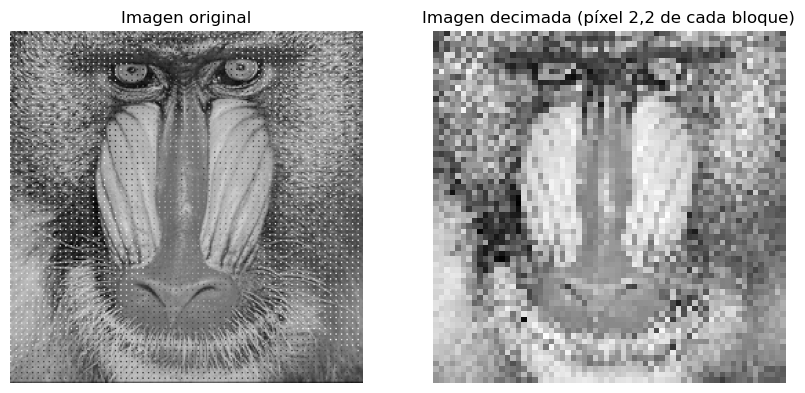

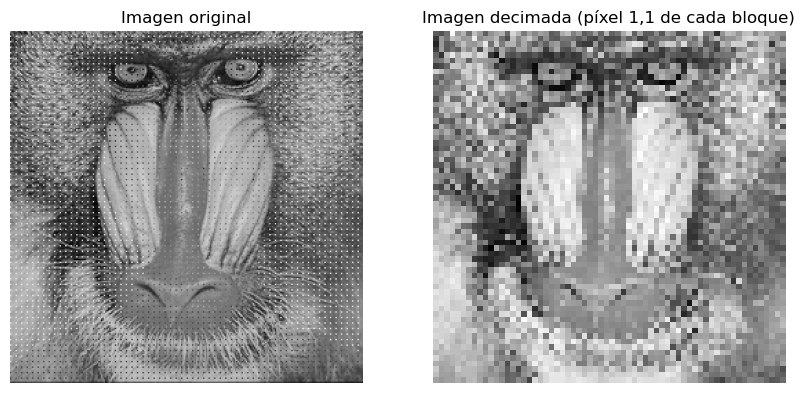

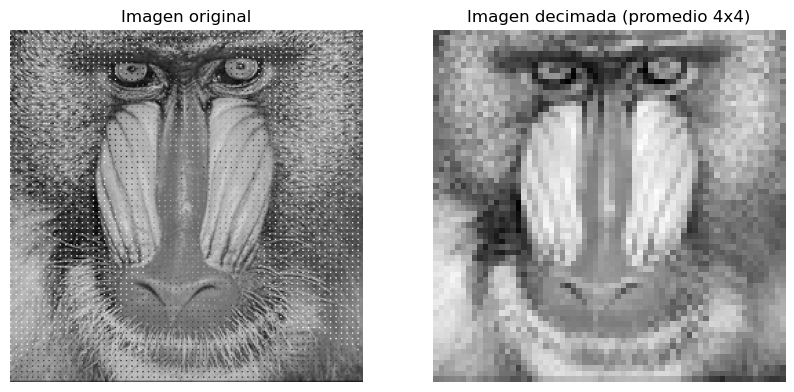

In [9]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Imagen original")
plt.imshow(img_array, cmap="gray" if img_array.ndim == 2 else None)
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("Imagen decimada (píxel 2,2 de cada bloque)")
plt.imshow(decimated_a, cmap="gray" if img_array.ndim == 2 else None)
plt.axis("off")
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Imagen original")
plt.imshow(img_array, cmap="gray" if img_array.ndim == 2 else None)
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("Imagen decimada (píxel 1,1 de cada bloque)")
plt.imshow(decimated_b, cmap="gray" if img_array.ndim == 2 else None)
plt.axis("off")
plt.show()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Imagen original")
plt.imshow(img_array, cmap="gray" if img_array.ndim == 2 else None)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Imagen decimada (promedio 4x4)")
plt.imshow(decimated_c, cmap="gray" if img_array.ndim == 2 else None)
plt.axis("off")

plt.show()



Ahora realizo las interpolaciones

Empecemos por la bilineal

In [10]:
def clamp(v, lo, hi):
    return max(lo, min(hi, v))
def bilinear_resize(src: np.ndarray, new_h: int, new_w: int) -> np.ndarray:
    src = src.astype(np.float32)
    h, w = src.shape
    dst = np.zeros((new_h, new_w), dtype=np.float32)

    # Mapeo de centros de píxel: destino -> fuente
    scale_y = h / new_h
    scale_x = w / new_w

    for y in range(new_h):
        fy = (y + 0.5) * scale_y - 0.5
        y0 = int(np.floor(fy))
        y1 = y0 + 1
        dy = fy - y0

        y0 = clamp(y0, 0, h - 1)
        y1 = clamp(y1, 0, h - 1)

        for x in range(new_w):
            fx = (x + 0.5) * scale_x - 0.5
            x0 = int(np.floor(fx))
            x1 = x0 + 1
            dx = fx - x0

            x0 = clamp(x0, 0, w - 1)
            x1 = clamp(x1, 0, w - 1)

            # Interp. horizontal en ambas filas
            top = (1 - dx) * src[y0, x0] + dx * src[y0, x1]
            bot = (1 - dx) * src[y1, x0] + dx * src[y1, x1]
            # Interp. vertical entre las dos filas
            val = (1 - dy) * top + dy * bot
            dst[y, x] = val

    return np.clip(dst, 0, 255).astype(np.uint8)
H, W = img_array.shape
a_bilinear = bilinear_resize(decimated_a, H, W)
b_bilinear = bilinear_resize(decimated_b, H, W)
c_bilinear = bilinear_resize(decimated_c, H, W)


Ahora la bicubica

In [11]:
def cubic_weight(t: float, a: float = -0.5) -> float:
    t = abs(t)
    if t <= 1:
        return (a + 2) * (t ** 3) - (a + 3) * (t ** 2) + 1
    elif t < 2:
        return a * (t ** 3) - 5 * a * (t ** 2) + 8 * a * t - 4 * a
    else:
        return 0.0

def bicubic_resize(src: np.ndarray, new_h: int, new_w: int, a: float = -0.5) -> np.ndarray:
    src = src.astype(np.float32)
    h, w = src.shape
    dst = np.zeros((new_h, new_w), dtype=np.float32)

    scale_y = h / new_h
    scale_x = w / new_w

    for y in range(new_h):
        fy = (y + 0.5) * scale_y - 0.5
        y_base = int(np.floor(fy))
        # Índices vecinos en Y: y_base-1, y_base, y_base+1, y_base+2
        ys = [clamp(y_base + k, 0, h - 1) for k in (-1, 0, 1, 2)]
        wy = np.array([cubic_weight(fy - (y_base + k), a) for k in (-1, 0, 1, 2)], dtype=np.float32)

        for x in range(new_w):
            fx = (x + 0.5) * scale_x - 0.5
            x_base = int(np.floor(fx))
            xs = [clamp(x_base + k, 0, w - 1) for k in (-1, 0, 1, 2)]
            wx = np.array([cubic_weight(fx - (x_base + k), a) for k in (-1, 0, 1, 2)], dtype=np.float32)

            # Suma separable: sum_y( wy[y_i] * sum_x( wx[x_j] * src[ys[y_i], xs[x_j]] ) )
            val = 0.0
            for iy in range(4):
                row_sum = 0.0
                src_row = src[ys[iy]]
                for ix in range(4):
                    row_sum += wx[ix] * src_row[xs[ix]]
                val += wy[iy] * row_sum

            dst[y, x] = val

    return np.clip(dst, 0, 255).astype(np.uint8)

a_bicubic = bicubic_resize(decimated_a, H, W, a=-0.5)
b_bicubic = bicubic_resize(decimated_b, H, W, a=-0.5)
c_bicubic = bicubic_resize(decimated_c, H, W, a=-0.5)


Muestro y comparo los resultados:

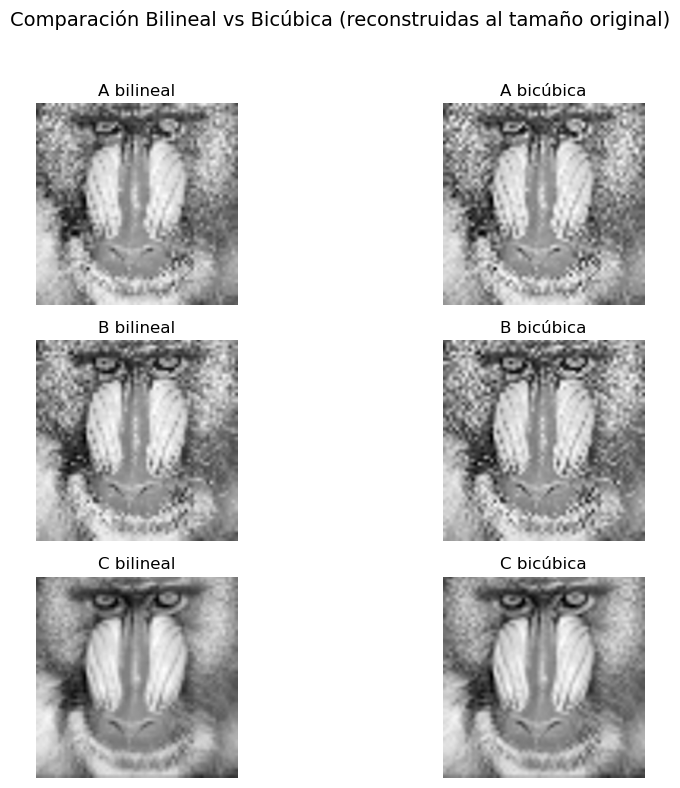

In [12]:
plt.figure(figsize=(10, 8))
plt.suptitle("Comparación Bilineal vs Bicúbica (reconstruidas al tamaño original)", fontsize=14)

# Para A
plt.subplot(3, 2, 1); plt.title("A bilineal"); plt.imshow(a_bilinear, cmap="gray"); plt.axis("off")
plt.subplot(3, 2, 2); plt.title("A bicúbica"); plt.imshow(a_bicubic, cmap="gray"); plt.axis("off")

# Para B
plt.subplot(3, 2, 3); plt.title("B bilineal"); plt.imshow(b_bilinear, cmap="gray"); plt.axis("off")
plt.subplot(3, 2, 4); plt.title("B bicúbica"); plt.imshow(b_bicubic, cmap="gray"); plt.axis("off")

# Para C
plt.subplot(3, 2, 5); plt.title("C bilineal"); plt.imshow(c_bilinear, cmap="gray"); plt.axis("off")
plt.subplot(3, 2, 6); plt.title("C bicúbica"); plt.imshow(c_bicubic, cmap="gray"); plt.axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Para terminar graficamos el espectro y obtenemos concluciones

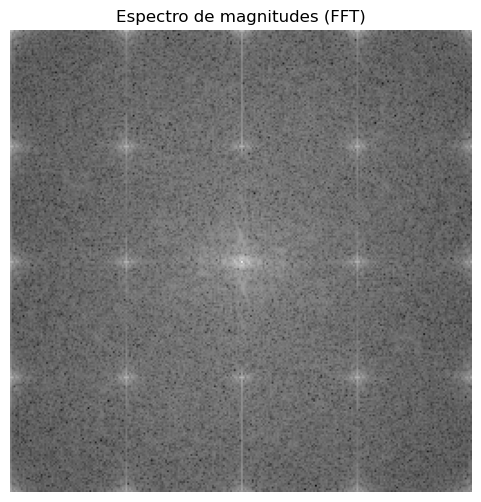

In [15]:
from numpy.fft import fft2, fftshift

# Transformada de Fourier 2D
f_transform = fft2(img_array)
f_shifted = fftshift(f_transform)

# Magnitud (módulo) en escala logarítmica para mejor visualización
magnitude_spectrum = np.log(1 + np.abs(f_shifted))

# Graficar
plt.figure(figsize=(6, 6))
plt.title("Espectro de magnitudes (FFT)")
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis("off")
plt.show()

Concluciones del espectro:
- El punto central brillante indica que la imagen tiene mucho contenido de bajas frecuencias (formas generales del mono).

- Hay picos distribuidos en una rejilla por lo que hay texturas repetitivas (pelaje, arrugas) en direcciones bien definidas.

- El “fondo” con puntitos más tenues representa frecuencias intermedias y altas distribuidas, que corresponden a detalles más finos.

